## Observations and Insights

### Data Analysis
* The sex of the mice in the study is equally distributed: 49.8% Female and 50.2% Male

* Mice treated with Capomulin and Ramicane drug regimens show the greatest improvement in tumor volume reduction. The greatest tumor volume reduction was observed between Day 10 and Day 30.

* It also appears that the heavier mice are less responsive to the treatment. 

-----

## Dependencies and starter code

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
mouse_metadata.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [3]:
study_results.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [4]:
# Combining both data into a single dataset using full outer join merge
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [5]:
tumor_volume_df = merge_df[["Drug Regimen","Tumor Volume (mm3)"]]

# Creating a data frame with summary statistics of the tumor volume

grp_stats = pd.DataFrame(tumor_volume_df.groupby("Drug Regimen").mean())
grp_stats["Median"]=tumor_volume_df.groupby("Drug Regimen").median()
grp_stats["Variance"]=tumor_volume_df.groupby("Drug Regimen").var()
grp_stats["Standard Deviation"]=tumor_volume_df.groupby("Drug Regimen").std()
grp_stats["SEM"]=tumor_volume_df.groupby("Drug Regimen").sem()
grp_stats.rename(columns={"Tumor Volume (mm3)":"Mean"}, inplace=True)
grp_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, '# of Data Points')

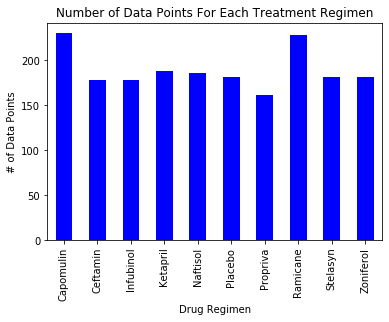

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# (assuming data points = Tumor Volume data)

drug_group = merge_df.groupby("Drug Regimen")
count_data = drug_group["Tumor Volume (mm3)"].count()

bar_chart = count_data.plot(kind = "bar", color = "blue", title ="Number of Data Points For Each Treatment Regimen")
bar_chart.set_ylabel("# of Data Points")

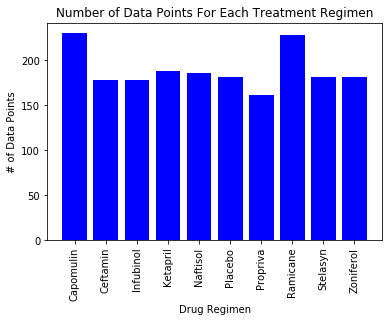

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# conver count_data object to DataFrame
group_df = count_data.reset_index()
x_values = group_df["Drug Regimen"]
y_values = group_df["Tumor Volume (mm3)"]

plt.bar(x_values, y_values, color = "blue")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Data Points")
plt.title("Number of Data Points For Each Treatment Regimen")
plt.xticks(rotation=90)

plt.show()

## Pie plots

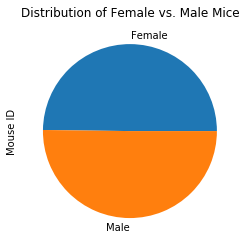

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a DataFrame
sex_group = merge_df.groupby("Sex").nunique()
unique_mouse = sex_group["Mouse ID"]

pie_chart = unique_mouse.plot.pie(y="Mouse ID")
pie_chart.set_title("Distribution of Female vs. Male Mice")
plt.show()

(-1.1017685314144796,
 1.1009347297692742,
 -1.1016630746735625,
 1.1000791940320744)

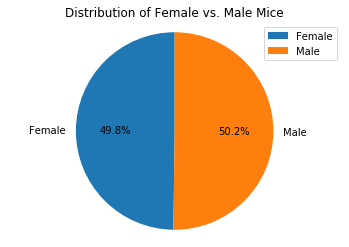

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = sex_group.drop(columns=["Sex"]).reset_index()
labels = sex_df["Sex"]

plt.pie(unique_mouse, labels = labels, startangle=90, autopct="%1.1f%%")
plt.title("Distribution of Female vs. Male Mice")
plt.legend()
plt.axis("equal")


## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Extract data for four treatment regimens
select_drug_df = merge_df.loc[(merge_df["Drug Regimen"] == "Capomulin") | (merge_df["Drug Regimen"] == "Ramicane") | (merge_df["Drug Regimen"] == "Infubinol") | (merge_df["Drug Regimen"] == "Ceftamin")  ]

# Create a DataFrame with final tumor only
final_day = merge_df["Timepoint"].max()
final_tumor_df = select_drug_df.loc[select_drug_df["Timepoint"] == final_day]

# Average final tumor volume across treatment
avg_final_tumor = pd.DataFrame(final_tumor_df.groupby("Drug Regimen").mean())

# Drop unrelated column and display summary DataFrame
avg_final_tumor = avg_final_tumor.drop(columns=["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
avg_final_tumor.rename(columns={"Tumor Volume (mm3)":"Average Final Tumor Volume (mm3)"}, inplace=True)
avg_final_tumor

,Average Final Tumor Volume (mm3)
Drug Regimen,
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Ramicane,34.955595


In [9]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_data_df = final_tumor_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
ramicane_data_df = final_tumor_df.loc[merge_df["Drug Regimen"] == "Ramicane"]
infubinol_data_df = final_tumor_df.loc[merge_df["Drug Regimen"] == "Infubinol"]
ceftamin_data_df = final_tumor_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]

# Capomulin IQR
capomulin_q1 = np.percentile(capomulin_data_df["Tumor Volume (mm3)"], 25)
capomulin_q3 = np.percentile(capomulin_data_df["Tumor Volume (mm3)"], 75)
capomulin_iqr = capomulin_q3 - capomulin_q1

# Ramicane IQR
ramicane_q1 = np.percentile(ramicane_data_df["Tumor Volume (mm3)"], 25)
ramicane_q3 = np.percentile(ramicane_data_df["Tumor Volume (mm3)"], 75)
ramicane_iqr = ramicane_q3 - ramicane_q1

# Infubinol IQR
infubinol_q1 = np.percentile(infubinol_data_df["Tumor Volume (mm3)"], 25)
infubinol_q3 = np.percentile(infubinol_data_df["Tumor Volume (mm3)"], 75)
infubinol_iqr = infubinol_q3 - infubinol_q1

# Ceftamin IQR
ceftamin_q1 = np.percentile(ceftamin_data_df["Tumor Volume (mm3)"], 25)
ceftamin_q3 = np.percentile(ceftamin_data_df["Tumor Volume (mm3)"], 75)
ceftamin_iqr = ceftamin_q3 - ceftamin_q1

# Create summary DataFrame
avg_final_tumor["Q1"] = [capomulin_q1, ceftamin_q1, infubinol_q1, ramicane_q1]
avg_final_tumor["Q3"] = [capomulin_q3, ceftamin_q3, infubinol_q3, ramicane_q3]
avg_final_tumor["IQR"] = [capomulin_iqr, ceftamin_iqr, infubinol_iqr, ramicane_iqr]
avg_final_tumor

,Average Final Tumor Volume (mm3),Q1,Q3,IQR
Drug Regimen,,,,
Capomulin,36.236114,32.377357,40.159220,7.781863
Ceftamin,64.132421,61.433892,67.527482,6.093590
Infubinol,65.755562,62.754451,67.685569,4.931117
Ramicane,34.955595,30.981175,38.508305,7.527130


In [10]:
# Identify outliers quantitatively. Low outliers = Q1 – 1.5(IQR), high outliers = Q3 + 1.5(IQR)

# Capomulin outliers
capomulin_outliers_check = capomulin_data_df.loc[(capomulin_data_df["Tumor Volume (mm3)"] < (capomulin_q1 - (1.5*capomulin_iqr))) | (capomulin_data_df["Tumor Volume (mm3)"] > (capomulin_q3 + (1.5*capomulin_iqr)))]
capomulin_outliers_count = capomulin_outliers_check["Tumor Volume (mm3)"].count()

# Ceftamin outliers
ceftamin_outliers_check = ceftamin_data_df.loc[(ceftamin_data_df["Tumor Volume (mm3)"] < (ceftamin_q1 - (1.5*ceftamin_iqr))) | (ceftamin_data_df["Tumor Volume (mm3)"] > (ceftamin_q3 + (1.5*ceftamin_iqr)))]
ceftamin_outliers_count = ceftamin_outliers_check["Tumor Volume (mm3)"].count()

# Infubinol outliers
infubinol_outliers_check = infubinol_data_df.loc[(infubinol_data_df["Tumor Volume (mm3)"] < (infubinol_q1 - (1.5*infubinol_iqr))) | (infubinol_data_df["Tumor Volume (mm3)"] > (infubinol_q3 + (1.5*infubinol_iqr)))]
infubinol_outliers_count = infubinol_outliers_check["Tumor Volume (mm3)"].count()

# Ramicane outliers
ramicane_outliers_check = ramicane_data_df.loc[(ramicane_data_df["Tumor Volume (mm3)"] < (ramicane_q1 - (1.5*ramicane_iqr))) | (ramicane_data_df["Tumor Volume (mm3)"] > (ramicane_q3 + (1.5*ramicane_iqr)))]
ramicane_outliers_count = ramicane_outliers_check["Tumor Volume (mm3)"].count()

avg_final_tumor["Number of Outliers"] = [capomulin_outliers_count, ceftamin_outliers_count, infubinol_outliers_count, ramicane_outliers_count]
avg_final_tumor

,Average Final Tumor Volume (mm3),Q1,Q3,IQR,Number of Outliers
Drug Regimen,,,,,
Capomulin,36.236114,32.377357,40.159220,7.781863,0
Ceftamin,64.132421,61.433892,67.527482,6.093590,0
Infubinol,65.755562,62.754451,67.685569,4.931117,0
Ramicane,34.955595,30.981175,38.508305,7.527130,0


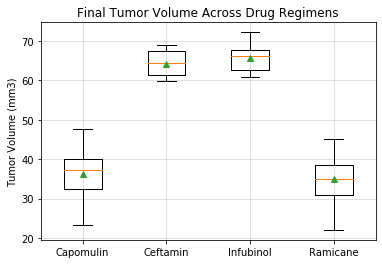

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Prepare data to plot
capomulin_array = capomulin_data_df["Tumor Volume (mm3)"]
ceftamin_array = ceftamin_data_df["Tumor Volume (mm3)"]
infubinol_array = infubinol_data_df["Tumor Volume (mm3)"]
ramicane_array = ramicane_data_df["Tumor Volume (mm3)"]

boxplot_data = [capomulin_array, ceftamin_array, infubinol_array, ramicane_array]
fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume Across Drug Regimens")
ax.boxplot(boxplot_data, showmeans = True)

plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha = 0.5)
plt.show()


## Line and scatter plots

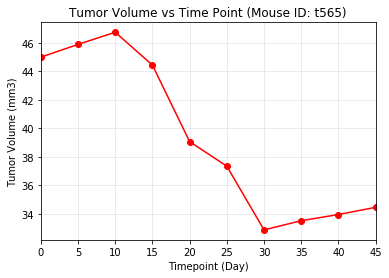

In [45]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_data = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"]

# choose one random mouse data
one_mouse_capomulin_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "t565"]

x_values_capomulin = one_mouse_capomulin_data["Timepoint"]
y_values_capomulin = one_mouse_capomulin_data["Tumor Volume (mm3)"]

plt.plot(x_values_capomulin, y_values_capomulin, color = "red", marker="o")

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Day)")
plt.title("Tumor Volume vs Time Point (Mouse ID: t565)")
plt.xlim(0, 45)
plt.grid(alpha = 0.3)
plt.show()

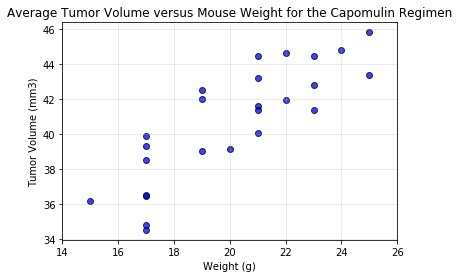

In [78]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Prepare data to plot. Group by Mouse ID to obtain average tumor volume for each mouse
average_tumor = pd.DataFrame(capomulin_data.groupby("Mouse ID").mean())

x_values_scatter = average_tumor["Weight (g)"]
y_values_scatter = average_tumor["Tumor Volume (mm3)"]

plt.scatter(x_values_scatter, y_values_scatter, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.grid(alpha = 0.3)
plt.xlim(14, 26)
plt.title("Average Tumor Volume versus Mouse Weight for the Capomulin Regimen")

plt.show()


In [64]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(x_values_scatter,y_values_scatter)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


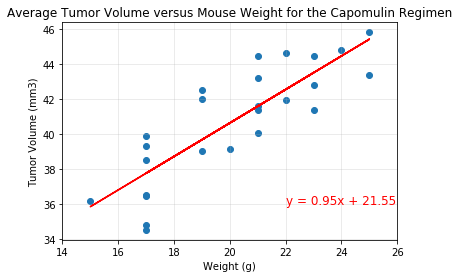

In [79]:
# Add the linear regression equation and line to plot

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_scatter, y_values_scatter)
regress_values = x_values_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_scatter,y_values_scatter)

plt.plot(x_values_scatter,regress_values,"r-")
plt.annotate(line_eq,(22,36),fontsize=12,color="red")

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Average Tumor Volume versus Mouse Weight for the Capomulin Regimen")
plt.grid(alpha = 0.3)
plt.xlim(14, 26)

plt.show()